<a href="https://colab.research.google.com/github/immy78/Deep_Learning/blob/master/mnist_digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
x_train.shape , y_train.shape

((60000, 28, 28), (60000,))

In [6]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

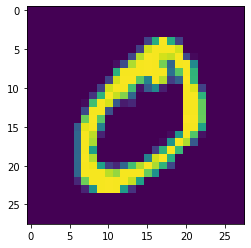

In [7]:
plt.imshow(x_train[1])

In [8]:
y_train[1]

0

In [9]:
x_train = x_train/255
x_test = x_test/255

In [10]:
x_train[0].shape

(28, 28)

In [11]:
# Reshaping x_train & x_test
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [17]:
input_shape = x_train[0].shape

In [20]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape =(28,28,1)))
model.add(Conv2D(filters=64,kernel_size =(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu',))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [22]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [23]:
history = model.fit(x_train,y_train,batch_size=128,epochs=10,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 151s 322ms/step - loss: 0.2369 - accuracy: 0.9271 - val_loss: 0.0557 - val_accuracy: 0.9821
Epoch 2/10
469/469 [==============================] - 150s 320ms/step - loss: 0.0839 - accuracy: 0.9749 - val_loss: 0.0396 - val_accuracy: 0.9857
Epoch 3/10
469/469 [==============================] - 149s 318ms/step - loss: 0.0638 - accuracy: 0.9802 - val_loss: 0.0312 - val_accuracy: 0.9893
Epoch 4/10
469/469 [==============================] - 150s 319ms/step - loss: 0.0502 - accuracy: 0.9847 - val_loss: 0.0277 - val_accuracy: 0.9901
Epoch 5/10
469/469 [==============================] - 149s 318ms/step - loss: 0.0451 - accuracy: 0.9862 - val_loss: 0.0290 - val_accuracy: 0.9913
Epoch 6/10
469/469 [==============================] - 150s 320ms/step - loss: 0.0392 - accuracy: 0.9874 - val_loss: 0.0268 - val_accuracy: 0.9904
Epoch 7/10
469/469 [==============================] - 150s 320ms/step - loss: 0.0345 - accuracy: 0.9888 - val_loss: 0.0257 -

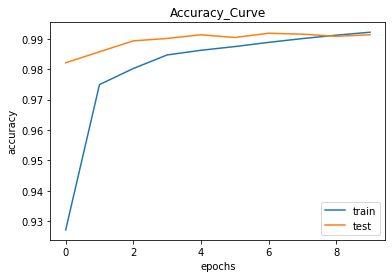

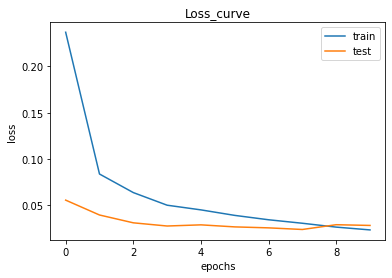

In [25]:
 plt.plot(history.history['accuracy'])
 plt.plot(history.history['val_accuracy'])
 plt.xlabel('epochs')
 plt.ylabel('accuracy')
 plt.legend(['train','test'])
 plt.title('Accuracy_Curve')
 plt.show()


 plt.plot(history.history['loss'])
 plt.plot(history.history['val_loss'])
 plt.xlabel('epochs')
 plt.ylabel('loss')
 plt.legend(['train','test'])
 plt.title('Loss_curve')
 plt.show()